### Import Relavant Libraries

In [72]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection as ms
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

### Load the Data

In [73]:
cancer_data = datasets.load_breast_cancer(return_X_y=False, as_frame=True)

### Explore the Data

In [74]:
df = cancer_data.frame
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [75]:
#df.describe()

In [76]:
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [77]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [78]:
#let's see what sort of data is in each column

#df.dtypes

#### Check feature distributions
Helps with choosing a scaler

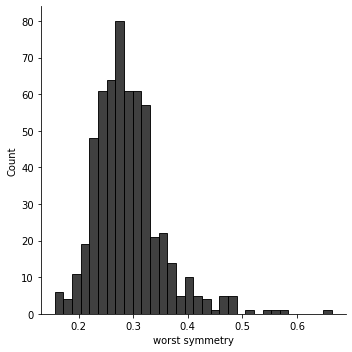

In [79]:
sns.displot(df['worst symmetry'],color="black")
plt.show()

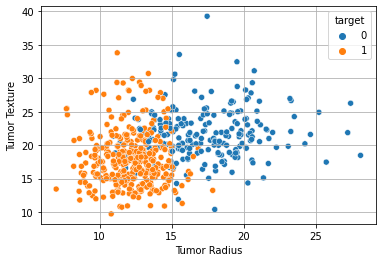

In [80]:
# Plot feature vs feature to just to kinda see what is going on
# Use the column names above

a = df['mean radius']
b = df['mean texture']
sns.scatterplot(x=a,y=b , hue=df['target'])
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()

### Dependent and Independent Variables

In [81]:
X = df.drop('target', axis = 1).copy()

X.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [82]:
y = df['target'].copy()

y.head(3)

0    0
1    0
2    0
Name: target, dtype: int32

### Centering and Scaling

In [83]:
scaler = preprocessing.StandardScaler().fit(X)

scaler

StandardScaler()

In [84]:
X_scaled = scaler.transform(X)

In [85]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 42)

In [86]:
model = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha = 0.1)

In [87]:
model.fit(X_train, y_train)

SGDClassifier(alpha=0.1)

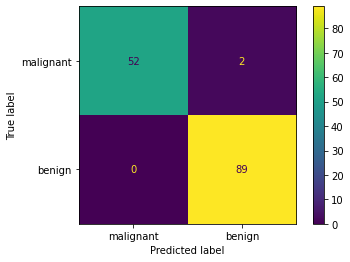

In [88]:
plot_confusion_matrix(model,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['malignant','benign'])

Pretty good actually

### Cross Validation

In [89]:
alpha = np.arange(1e-15,1,0.005) # Range of hyperparameter values 1E-15 to 1 by 0.005
val_scores = np.zeros((len(alpha),1)) # Initialize validation score for each alpha value

for i in range(len(alpha)): # for each alpha value
    # Set up SVM with hinge loss and l2 norm regularization
    model = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha[i])
    # Calculate cross validation scores for 5-fold cross-validation
    score = ms.cross_val_score(model, X_scaled, y, cv=5)
    val_scores[i] = score.mean() # Calculate mean of the 5 scores

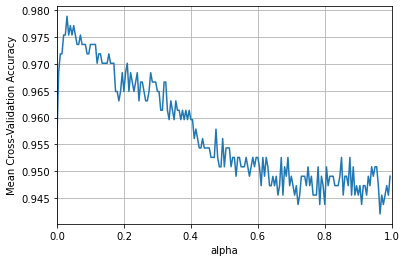

In [90]:
# Plot how cross-validation score changes with alpha
plt.plot(alpha,val_scores)
plt.xlim(0,1)
plt.xlabel('alpha')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()

alpha_star = 0.030000000000000998


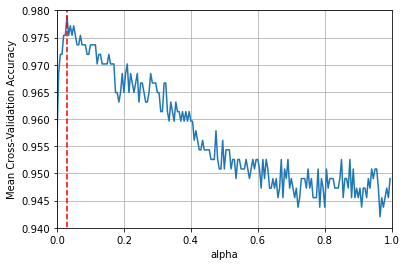

In [91]:
# Determine the alpha that maximizes the cross-validation score
ind = np.argmax(val_scores)
alpha_star = alpha[ind]
print('alpha_star =', alpha_star)

plt.plot(alpha,val_scores)
plt.plot(np.ones(11)*alpha_star,np.arange(0,1.1,0.1),'--r')
plt.xlim(0,1)
plt.ylim(0.94,0.98)
plt.xlabel('alpha')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.grid(True)
plt.show()


### Final Model

In [92]:
# Train model with alpha_star
model_star = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha_star)
model_trained = model_star.fit(X_train,y_train)
print('Training Accuracy =', model_trained.score(X_train,y_train))


Training Accuracy = 0.9812206572769953


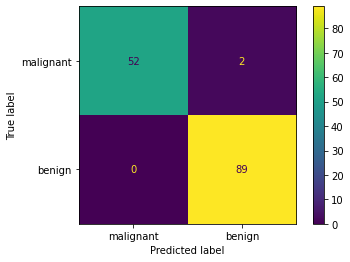

In [93]:
plot_confusion_matrix(model_trained,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['malignant','benign'])